In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_bank = pd.read_csv("/content/drive/MyDrive/Maestria Ciencia De Datos/Aprendizaje_automatico/Datos_Clases/dataset_banco_clean.csv")
data_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


### 1. Estructura y descripción general del dataset
- a)  ¿Cuántas filas y columnas tiene el dataset?
- b) ¿Cuáles son los nombres y tipos de las columnas? ¿Qué variables son categóricas y cuáles son numéricas?
- c) ¿Hay valores nulos en el dataset? Si es así, ¿en qué columnas y cuántos?




In [3]:
#a)
row, column = data_bank.shape
print(f"El número de filas es: {row} y el número de columnas es: {column}")

El número de filas es: 45189 y el número de columnas es: 17


In [ ]:
#b)
data_columns = data_bank.columns
data_types = data_bank.dtypes
print("Nombre de las columnas:")
print(data_columns)
print("\nTipos de las columnas:")
print(data_types)
print("\n")
data_object = {
    "Category":data_bank.select_dtypes(include=['object', 'category']).columns,
    "Numeric": data_bank.select_dtypes(include=['number']).columns}
print(f"Variables Categóricas: {data_object['Category']}")
print("\n")
print(f"Variables Numéricas: {data_object['Numeric']}")

Nombre de las columnas:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Tipos de las columnas:
age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays        float64
previous       int64
poutcome      object
y             object
dtype: object


Variables Categóricas: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


Variables Numéricas: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [ ]:
#c)
data_null = data_bank.isnull().sum()
print(f"Columnas con valores nulos: {data_null}")

Columnas con valores nulos: age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
#c) Probamos para objetos tipo nan en Numpy
data_nan = data_bank.isna().sum()
if data_bank.isnull().values.any():
  print("Hay valores Nan en el dataset")
else:
  print("No hay valores Nan en el dataset")

print(data_nan)


No hay valores Nan en el dataset
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


### podemos observar que no hay valores nulos en nuestras columnas

### 2. Análisis de las variables numéricas
- a) ¿Cuál es la distribución de la columna age? ¿Qué edad es la más común entre los clientes?
- b) ¿Cuál es el rango, la media, la mediana y los cuartiles de las columnas numéricas (age, balance, duration, etc.)?
- c) ¿Hay valores atípicos (outliers) en la columna balance o duration? Si es así, - ¿cómo los identificarías?
- d) ¿Cómo se distribuyen los valores de la columna previous (número de contactos previos con el cliente)?
- e) ¿Cuál es la duración promedio (duration) de las campañas de contacto en función de la columna y (si el cliente aceptó o no la oferta)?




Estadísticas descriptivas de la variable 'age':
count    45189.000000
mean        40.936445
std         10.618502
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


La edad más común entre los clientes es: 32




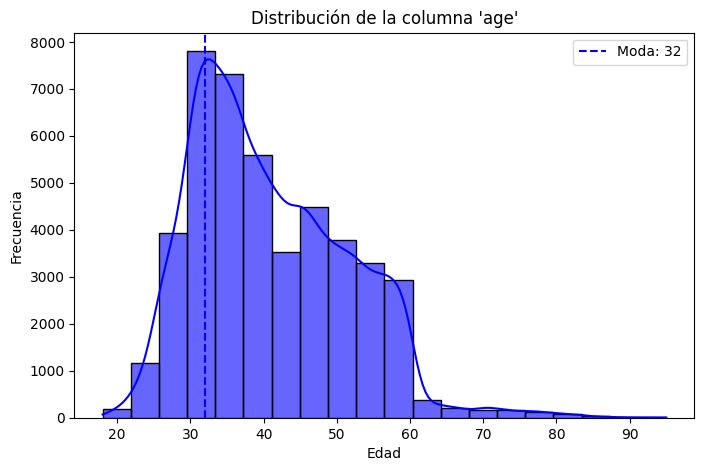

In [25]:
import seaborn as sns

#a)
print("Estadísticas descriptivas de la variable 'age':")
print(data_bank['age'].describe())
print("\n")
edad_mas_comun = data_bank['age'].mode()[0]
print(f"La edad más común entre los clientes es: {edad_mas_comun}")
print("\n")
plt.figure(figsize=(8, 5))
sns.histplot(data_bank['age'], bins=20, kde=True, color='blue', alpha=0.6)
plt.axvline(edad_mas_comun, color='blue', linestyle='dashed', label=f"Moda: {edad_mas_comun}")
plt.title("Distribución de la columna 'age'")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

In [ ]:
#b)
# Rango (máximo - mínimo)
rango = data_bank[data_object['Numeric']].max() - data_bank[data_object['Numeric']].min()

# Media
media = data_bank[data_object['Numeric']].mean()

# Mediana
mediana = data_bank[data_object['Numeric']].median()

# Cuartiles
cuartiles = data_bank[data_object['Numeric']].quantile([0.25, 0.5, 0.75])

# Mostrar los resultados
print("Rango:")
print(rango)
print("\nMedia:")
print(media)
print("\nMediana:")
print(mediana)
print("\nCuartiles:")
print(cuartiles)

Rango:
age             77.0
balance     535551.0
day             30.0
duration      4917.0
campaign        62.0
pdays          872.0
previous        58.0
dtype: float64

Media:
age           40.936445
balance     1374.012149
day           15.807188
duration     258.115006
campaign       2.763283
pdays         40.178893
previous       0.574166
dtype: float64

Mediana:
age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64

Cuartiles:
       age  balance   day  duration  campaign  pdays  previous
0.25  33.0     72.0   8.0     103.0       1.0   -1.0       0.0
0.50  39.0    448.0  16.0     180.0       2.0   -1.0       0.0
0.75  48.0   1428.0  21.0     319.0       3.0   -1.0       0.0


In [ ]:
numericas = data_bank.select_dtypes(include=['number'])
numericas

,age,balance,day,duration,campaign,pdays,previous
0,58,2143.0,5,261.0,1,-1.0,0
1,44,29.0,5,151.0,1,-1.0,0
2,33,2.0,5,76.0,1,-1.0,0
3,47,1506.0,5,92.0,1,-1.0,0
4,33,1.0,5,198.0,1,-1.0,0
...,...,...,...,...,...,...,...
45184,51,825.0,17,977.0,3,-1.0,0
45185,71,1729.0,17,456.0,2,-1.0,0
45186,72,5715.0,17,1127.0,5,184.0,3
45187,57,668.0,17,508.0,4,-1.0,0


In [ ]:
data_bank[data_object['Numeric']]

,age,balance,day,duration,campaign,pdays,previous
0,58,2143.0,5,261.0,1,-1.0,0
1,44,29.0,5,151.0,1,-1.0,0
2,33,2.0,5,76.0,1,-1.0,0
3,47,1506.0,5,92.0,1,-1.0,0
4,33,1.0,5,198.0,1,-1.0,0
...,...,...,...,...,...,...,...
45184,51,825.0,17,977.0,3,-1.0,0
45185,71,1729.0,17,456.0,2,-1.0,0
45186,72,5715.0,17,1127.0,5,184.0,3
45187,57,668.0,17,508.0,4,-1.0,0



### Problema 3

Análisis de las variables categóricas

- a) ¿Cuáles son las categorías únicas de las variables job, marital, education, default, y poutcome?
- b) ¿Cuál es la frecuencia de cada categoría en la columna job? ¿Qué profesiones son más comunes?
- c) ¿Qué proporción de clientes tienen housing (créditos hipotecarios) y qué proporción tienen loan (otros préstamos)?
- d) ¿Cómo se distribuyen las campañas exitosas (y = yes) en función de la columna contact (tipo de contacto)?

In [4]:
#a)
categorical_cols = ['job', 'marital', 'education', 'default', 'poutcome']
categorias_unicas = {col: data_bank[col].unique() for col in categorical_cols}
for col, categorias in categorias_unicas.items():
    print(f"Categorías únicas en '{col}': {categorias}")

Categorías únicas en 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']
Categorías únicas en 'marital': ['married' 'single' 'divorced']
Categorías únicas en 'education': ['tertiary' 'secondary' 'unknown' 'primary']
Categorías únicas en 'default': ['no' 'yes']
Categorías únicas en 'poutcome': ['unknown' 'failure' 'other' 'success']


In [5]:
#b)
frecuencia_job = data_bank['job'].value_counts()
print("Frecuencia de cada categoría en 'job':")
print(frecuencia_job)
print("\nLas 5 profesiones más comunes:")
print(frecuencia_job.head(5))

Frecuencia de cada categoría en 'job':
job
blue-collar       9727
management        9455
technician        7592
administrative    5168
services          4152
retired           2263
self-employed     1578
entrepreneur      1486
unemployed        1303
housemaid         1240
student            937
unknown            288
Name: count, dtype: int64

Las 5 profesiones más comunes:
job
blue-collar       9727
management        9455
technician        7592
administrative    5168
services          4152
Name: count, dtype: int64


In [6]:
#c)
proporcion_housing = data_bank['housing'].value_counts(normalize=True) * 100
proporcion_loan = data_bank['loan'].value_counts(normalize=True) * 100
print("Proporción de clientes con créditos hipotecarios (housing):")
print(proporcion_housing)
print("\nProporción de clientes con otros préstamos (loan):")
print(proporcion_loan)

Proporción de clientes con créditos hipotecarios (housing):
housing
yes    55.568833
no     44.431167
Name: proportion, dtype: float64

Proporción de clientes con otros préstamos (loan):
loan
no     83.976189
yes    16.023811
Name: proportion, dtype: float64


In [7]:
#d)
campañas_exitosas = data_bank[data_bank['y'] == 'yes']
frecuencia_contact = campañas_exitosas['contact'].value_counts()
print("Distribución de campañas exitosas por tipo de contacto:")
print(frecuencia_contact)

Distribución de campañas exitosas por tipo de contacto:
contact
cellular     4367
unknown       529
telephone     389
Name: count, dtype: int64


### Problema 4.
Relaciones entre variables

- a) ¿Hay correlaciones fuertes entre las columnas numéricas? Por ejemplo, entre duration, campaign, y pdays (último contacto en días).
-b)  ¿Cómo se relaciona la edad (age) con el balance promedio (balance)?
-c)  ¿Hay diferencias en el balance (balance) promedio según el estado civil (marital)?
-d)  ¿Cómo varía la duración (duration) de las llamadas según el resultado de la campaña (y)?
-e)  ¿Qué combinación de job y education tiene mayor proporción de campañas exitosas (y = yes)?

Matriz de correlación entre duration, campaign y pdays:
          duration  campaign     pdays
duration  1.000000 -0.084375 -0.002094
campaign -0.084375  1.000000 -0.088624
pdays    -0.002094 -0.088624  1.000000


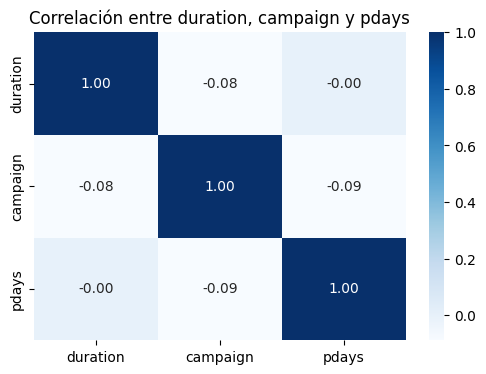

In [10]:
#a)
import seaborn as sns
import matplotlib.pyplot as plt
correlation_columns = ['duration', 'campaign', 'pdays']
correlation_matrix = data_bank[correlation_columns].corr()

print("Matriz de correlación entre duration, campaign y pdays:")
print(correlation_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlación entre duration, campaign y pdays")
plt.show()

Correlación entre edad y balance:
             age  balance
age      1.00000  0.08012
balance  0.08012  1.00000


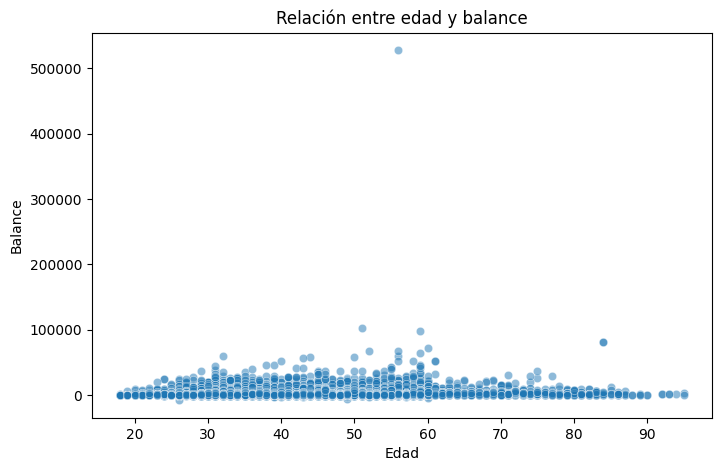

In [9]:
#b)
correlacion_age_balance = data_bank[['age', 'balance']].corr()
print("Correlación entre edad y balance:")
print(correlacion_age_balance)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_bank['age'], y=data_bank['balance'], alpha=0.5)
plt.title("Relación entre edad y balance")
plt.xlabel("Edad")
plt.ylabel("Balance")
plt.show()

Balance promedio por estado civil:
marital
divorced    1179.046118
married     1445.322978
single      1301.657724
Name: balance, dtype: float64


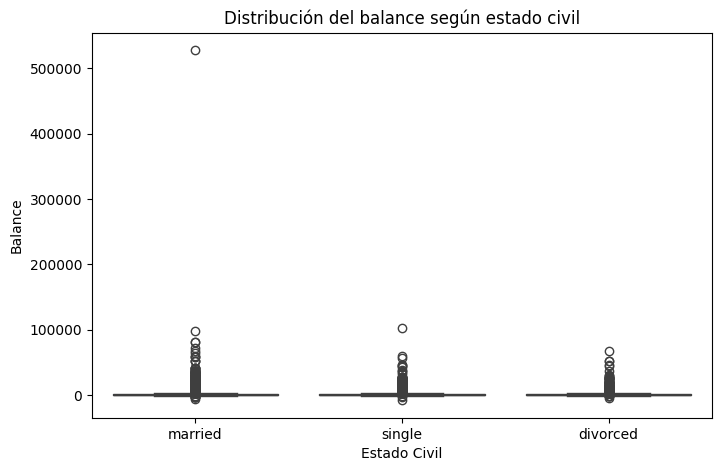

In [11]:
#c)
balance_marital = data_bank.groupby('marital')['balance'].mean()
print("Balance promedio por estado civil:")
print(balance_marital)

plt.figure(figsize=(8, 5))
sns.boxplot(x=data_bank['marital'], y=data_bank['balance'])
plt.title("Distribución del balance según estado civil")
plt.xlabel("Estado Civil")
plt.ylabel("Balance")
plt.show()

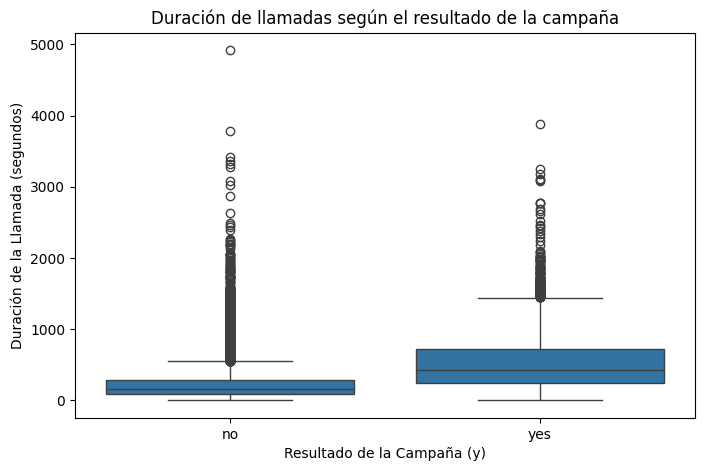

In [12]:
#d)
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_bank['y'], y=data_bank['duration'])
plt.title("Duración de llamadas según el resultado de la campaña")
plt.xlabel("Resultado de la Campaña (y)")
plt.ylabel("Duración de la Llamada (segundos)")
plt.show()

Combinaciones de job y education con mayor tasa de éxito:
job         education
student     primary      0.363636
            secondary    0.297244
retired     tertiary     0.275956
student     tertiary     0.265766
            unknown      0.263804
retired     unknown      0.252101
            primary      0.223899
            secondary    0.209563
management  unknown      0.198347
unemployed  tertiary     0.193772
Name: yes, dtype: float64


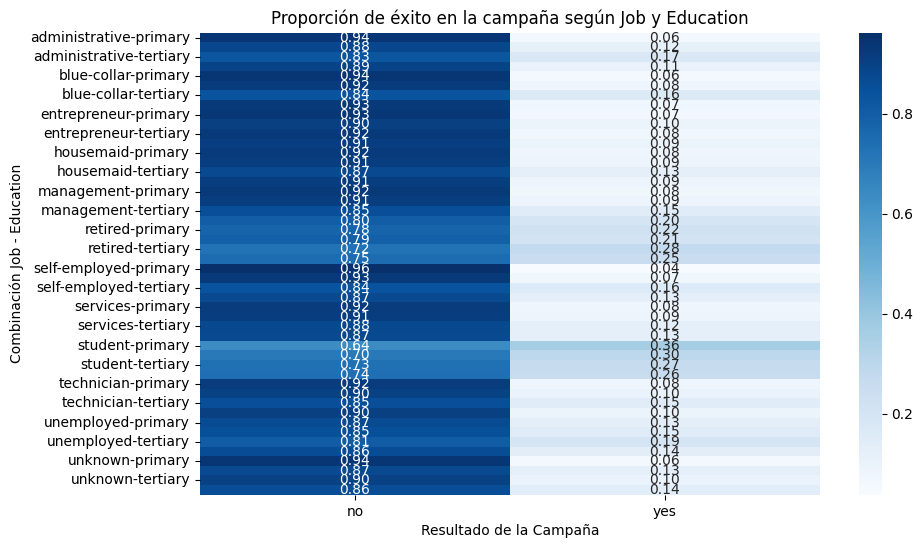

In [13]:
#e)
tabla_exito = data_bank.groupby(['job', 'education'])['y'].value_counts(normalize=True).unstack()
proporcion_exito = tabla_exito['yes'].sort_values(ascending=False)

print("Combinaciones de job y education con mayor tasa de éxito:")
print(proporcion_exito.head(10))

plt.figure(figsize=(10, 6))
sns.heatmap(tabla_exito, annot=True, cmap="Blues", fmt=".2f")
plt.title("Proporción de éxito en la campaña según Job y Education")
plt.xlabel("Resultado de la Campaña")
plt.ylabel("Combinación Job - Education")
plt.show()

### Problema 5.
Análisis temporal
- a) ¿En qué meses (month) se realizaron más contactos? ¿Existen patrones temporales en los resultados exitosos (y)?
- b) ¿Cómo varían las campañas exitosas según el día de la semana (day)?
- c) ¿Hay clientes contactados con frecuencia (campaign > 3)? ¿Qué resultados (y) tienen estos contactos?

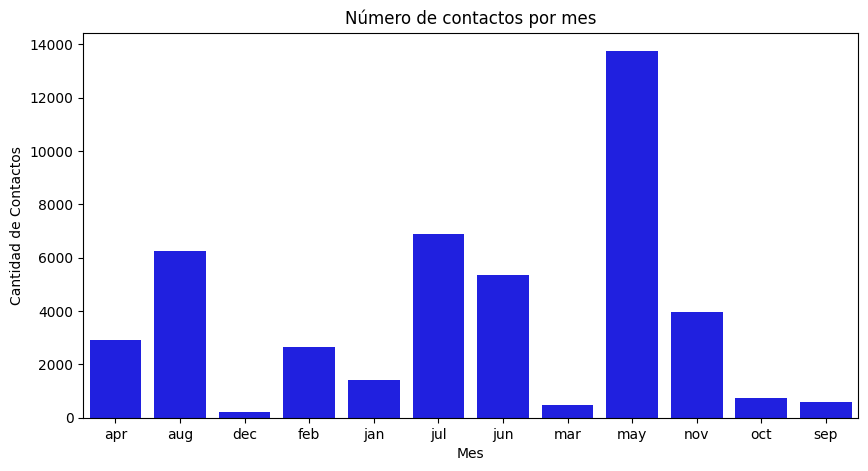

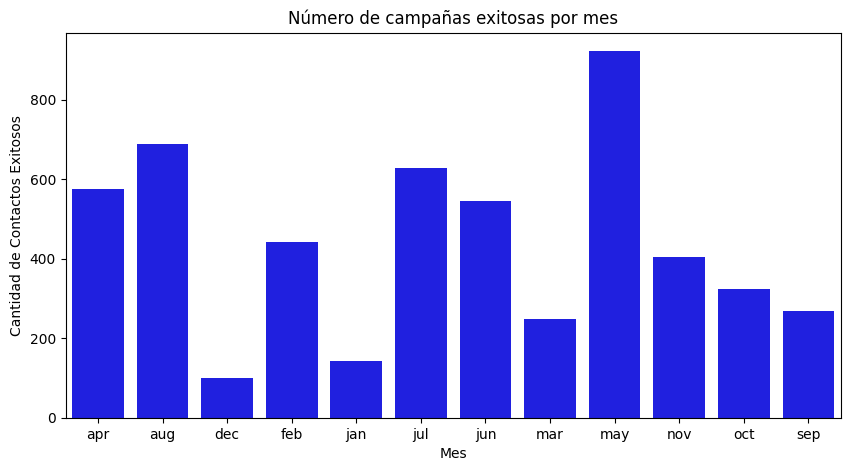

In [14]:
#a)
import seaborn as sns
import matplotlib.pyplot as plt

contactos_por_mes = data_bank['month'].value_counts().sort_index()

exitos_por_mes = data_bank[data_bank['y'] == 'yes']['month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=contactos_por_mes.index, y=contactos_por_mes.values, color="blue")
plt.title("Número de contactos por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Contactos")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=exitos_por_mes.index, y=exitos_por_mes.values, color="blue")
plt.title("Número de campañas exitosas por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Contactos Exitosos")
plt.show()

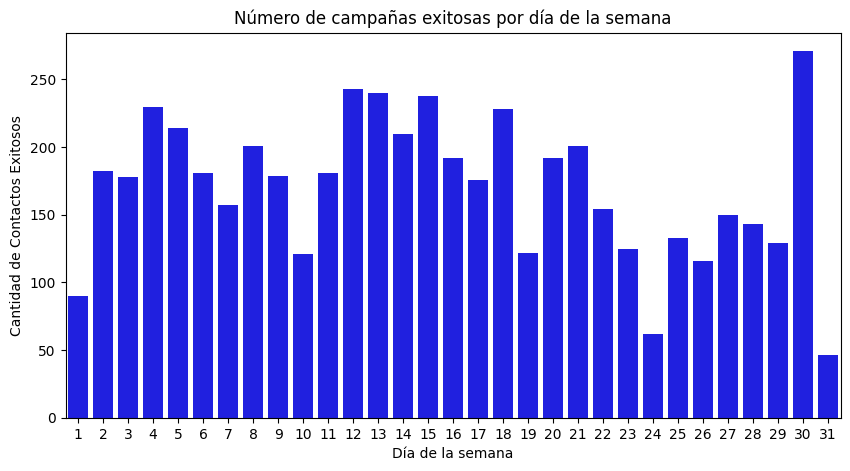

In [15]:
#b)
exitos_por_dia = data_bank[data_bank['y'] == 'yes']['day'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=exitos_por_dia.index, y=exitos_por_dia.values, color="blue")
plt.title("Número de campañas exitosas por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de Contactos Exitosos")
plt.show()

Resultados de campañas en clientes con más de 3 contactos:
y
no     92.65179
yes     7.34821
Name: proportion, dtype: float64


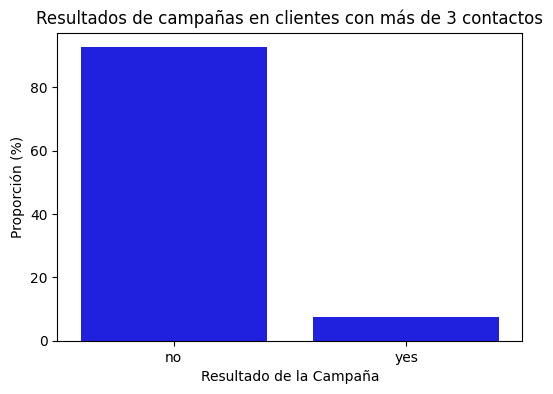

In [16]:
#c)
clientes_frecuentes = data_bank[data_bank['campaign'] > 3]

exitos_frecuentes = clientes_frecuentes['y'].value_counts(normalize=True) * 100

print("Resultados de campañas en clientes con más de 3 contactos:")
print(exitos_frecuentes)

plt.figure(figsize=(6, 4))
sns.barplot(x=exitos_frecuentes.index, y=exitos_frecuentes.values, color="blue")
plt.title("Resultados de campañas en clientes con más de 3 contactos")
plt.xlabel("Resultado de la Campaña")
plt.ylabel("Proporción (%)")
plt.show()

### Problema 6.
Análisis
- a) ¿Qué variables parecen influir más en el resultado exitoso (y) de las campañas?
- b) ¿Cuál es la relación entre el número de contactos previos (previous) y el resultado exitoso (y)?
- c) ¿Cómo influyen los valores de la columna poutcome (resultado de campañas anteriores) en los resultados actuales (y)?
- d) ¿Qué porcentaje de los clientes con default (préstamo en mora) aceptaron una nueva oferta (y = yes)?
- e) ¿Cómo se distribuyen las campañas exitosas en función de variables combinadas como job y housing?

Variables más influyentes en el éxito de la campaña (correlación con y_numeric):
y_yes                  1.000000
y_numeric              1.000000
duration               0.394073
poutcome_success       0.306920
month_mar              0.129513
month_oct              0.128591
month_sep              0.123241
previous               0.113564
pdays                  0.103453
job_retired            0.079035
job_student            0.077036
month_dec              0.075198
education_tertiary     0.066449
marital_single         0.063561
balance                0.039912
month_feb              0.038497
job_management         0.032877
poutcome_other         0.031786
age                    0.024986
job_unemployed         0.020414
contact_telephone      0.013863
education_unknown      0.012078
job_self-employed      0.000918
job_unknown            0.000275
month_aug             -0.008478
month_jan             -0.008725
job_technician        -0.009008
month_nov             -0.014912
job_housemaid         -

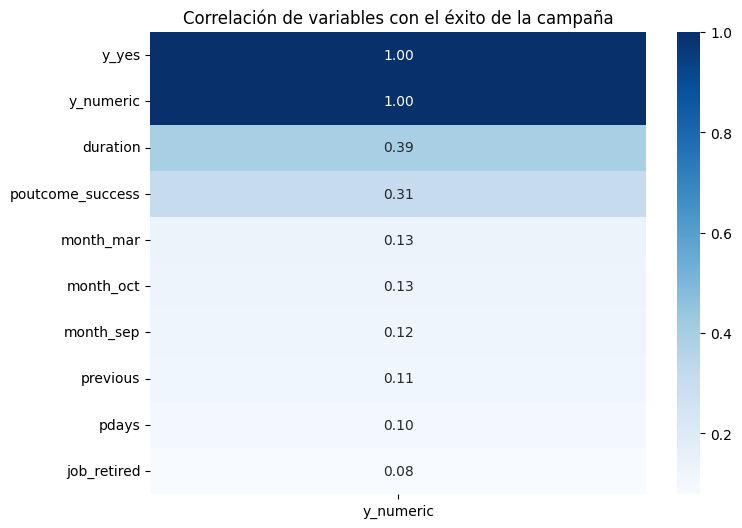

In [19]:
#a)
import seaborn as sns
import matplotlib.pyplot as plt

data_bank['y_numeric'] = data_bank['y'].map({'yes': 1, 'no': 0})

data_numeric = pd.get_dummies(data_bank, drop_first=True)

correlation_matrix = data_numeric.corr()['y_numeric'].sort_values(ascending=False)

print("Variables más influyentes en el éxito de la campaña (correlación con y_numeric):")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix.head(10).to_frame(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlación de variables con el éxito de la campaña")
plt.show()

<ipython-input-20-3bf8a3cb7d77>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_bank['y'], y=data_bank['previous'], palette="Blues")


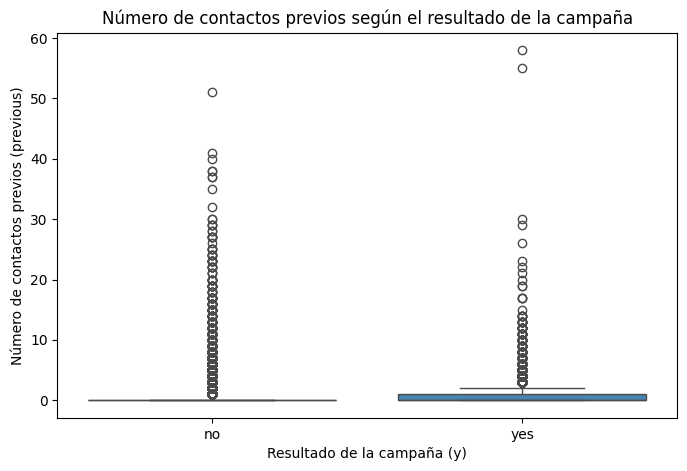

In [20]:
#b)
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_bank['y'], y=data_bank['previous'], palette="Blues")
plt.title("Número de contactos previos según el resultado de la campaña")
plt.xlabel("Resultado de la campaña (y)")
plt.ylabel("Número de contactos previos (previous)")
plt.show()

Proporción de éxitos por resultado de campañas anteriores (poutcome):
y                no        yes
poutcome                      
failure   87.403022  12.596978
other     83.342406  16.657594
success   35.274653  64.725347
unknown   90.839943   9.160057


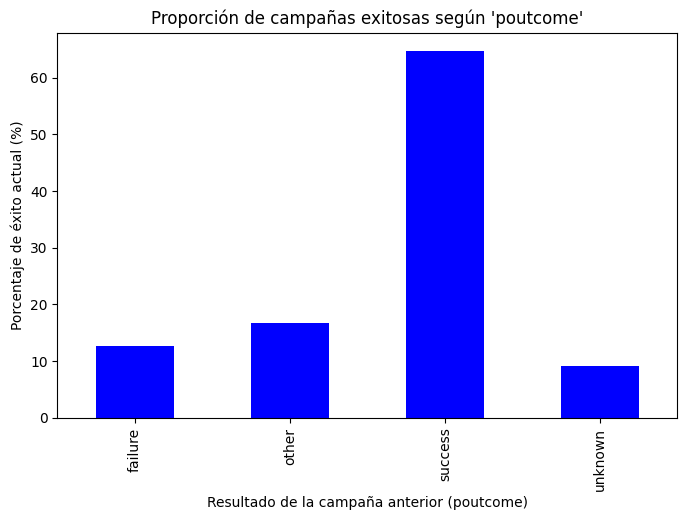

In [21]:
#c)
exito_por_poutcome = data_bank.groupby('poutcome')['y'].value_counts(normalize=True).unstack() * 100

print("Proporción de éxitos por resultado de campañas anteriores (poutcome):")
print(exito_por_poutcome)

plt.figure(figsize=(8, 5))
exito_por_poutcome['yes'].plot(kind='bar', color="blue")
plt.title("Proporción de campañas exitosas según 'poutcome'")
plt.xlabel("Resultado de la campaña anterior (poutcome)")
plt.ylabel("Porcentaje de éxito actual (%)")
plt.show()

Proporción de clientes con default que aceptaron la campaña:
y
no     93.619632
yes     6.380368
Name: proportion, dtype: float64


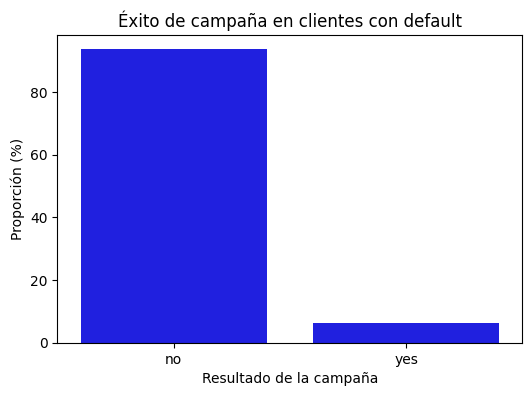

In [22]:
#d)
exito_por_default = data_bank[data_bank['default'] == 'yes']['y'].value_counts(normalize=True) * 100

print("Proporción de clientes con default que aceptaron la campaña:")
print(exito_por_default)

plt.figure(figsize=(6, 4))
sns.barplot(x=exito_por_default.index, y=exito_por_default.values, color="blue")
plt.title("Éxito de campaña en clientes con default")
plt.xlabel("Resultado de la campaña")
plt.ylabel("Proporción (%)")
plt.show()

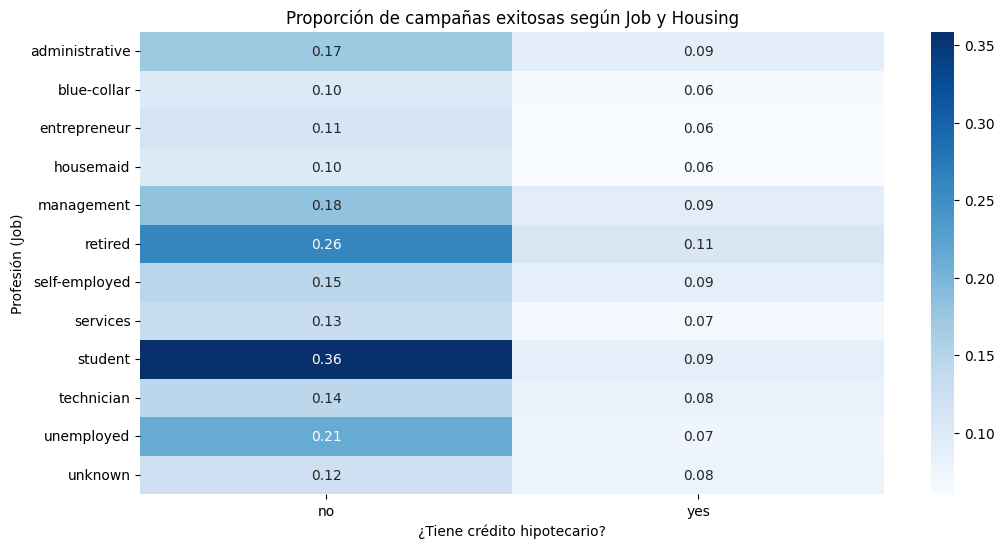

In [23]:
#e)
exito_por_job_housing = data_bank.groupby(['job', 'housing'])['y'].value_counts(normalize=True).unstack()

exito_por_job_housing = exito_por_job_housing['yes'].unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(exito_por_job_housing, annot=True, cmap="Blues", fmt=".2f")
plt.title("Proporción de campañas exitosas según Job y Housing")
plt.xlabel("¿Tiene crédito hipotecario?")
plt.ylabel("Profesión (Job)")
plt.show()